In [374]:
import h5py
import numpy as np
import seaborn as sns
import sklearn.preprocessing
import matplotlib.pyplot as plt

# %hist -o -g -f ipython_history.md

In [14]:
def get_matlab_data(file_path, is_label: bool):
    """reading a .mat file to extract the images or the labels"""

    

    with h5py.File(file_path, 'r') as f:
        
        print(f"Started reading {file_path} . . . ")
    
        data_keys =  list(f.keys())[1]
        refs = f[data_keys][0][:] # get object references
        num_of_examples = len(refs)
    
        if is_label: # Check if the this is a labels file
            labels_data =  np.array(
                [''.join(map(chr, np.squeeze(f[refs[i]]))) for i in range(num_of_examples)]
                )
            print(f"Completed reading {file_path} labels file")   
            return labels_data  
        else: # If not labels file
            examples_data =  np.array(
                [np.transpose(np.array(f[refs[i]])) for i in range(num_of_examples)]
                )
            print(f"Completed reading {file_path} examples file")   
            return examples_data


In [15]:
# Extract examples from the .mat files
train_data = get_matlab_data('Data/train_data.mat', is_label=False)
validation_data = get_matlab_data('Data/val_data.mat', is_label=False)
test_data = get_matlab_data('Data/test_data.mat', is_label=False)

Started reading Data/train_data.mat . . . 
Completed reading Data/train_data.mat examples file
Started reading Data/val_data.mat . . . 
Completed reading Data/val_data.mat examples file
Started reading Data/test_data.mat . . . 
Completed reading Data/test_data.mat examples file


In [4]:
print(f"The training data has a shape of {train_data.shape}")
print(f"The validation data has a shape of {validation_data.shape}")
print(f"The test data has a shape of {test_data.shape}")

The training data has a shape of (29894, 128, 128)
The validation data has a shape of (3733, 128, 128)
The test data has a shape of (3733, 128, 128)


In [5]:
# Get labels
train_label = get_matlab_data('Data/train_labels.mat', is_label=True)
validation_label = get_matlab_data('Data/val_labels.mat', is_label=True)
test_label = get_matlab_data('Data/test_labels.mat', is_label=True)

Started reading Data/train_labels.mat . . . 
Completed reading Data/train_labels.mat
Started reading Data/val_labels.mat . . . 
Completed reading Data/val_labels.mat
Started reading Data/test_labels.mat . . . 
Completed reading Data/test_labels.mat


In [6]:
def minmaxscaler(data, global_min, global_max):
    """Normlising examples between 0-1 using the global minimum and maximum"""    
    return (data - global_min)/(global_max - global_min)

In [7]:
# Normalising the data 0 -> 1

global_min = np.amin(np.concatenate((train_data, test_data, validation_data)))
global_max = np.amax(np.concatenate((train_data, test_data, validation_data)))

train_data_scaled = minmaxscaler(train_data, global_min, global_max)
test_data_scaled = minmaxscaler(test_data, global_min, global_max)
validation_data_scaled = minmaxscaler(validation_data, global_min, global_max)

C:\Users\nyasha\anaconda3\envs\masters\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

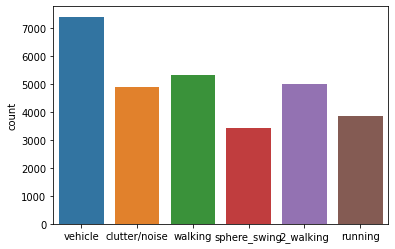

In [8]:
# Creating a count plot
sns.countplot(train_label)

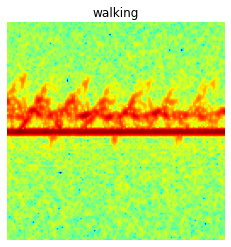

In [373]:

 
def plot_random_spectrogram():
    """Plots a random image from the training data"""
    image_num = np.random.randint(len(train_data))
    random_image = train_data[image_num]
    plt.imshow(random_image, cmap='jet')
    plt.title(f'{train_label[image_num]}')
    plt.axis('off')
    plt.show()

plot_random_spectrogram()



In [88]:
plt.hist(train_data_scaled.flatten())

KeyboardInterrupt: 

In [168]:
np.where(train_label == 'walking')

(array([12297, 12298, 12299, ..., 17602, 17603, 17604], dtype=int64),)

In [10]:
walking_data = train_data_scaled[np.where(train_label == 'walking')].flatten()
vehicle_data = train_data_scaled[np.where(train_label == 'vehicle')].flatten()
clutter_data = train_data_scaled[np.where(train_label == 'clutter/noise')].flatten()
sphere_swing_data = train_data_scaled[np.where(train_label == 'sphere_swing')].flatten()
walking_2_data = train_data_scaled[np.where(train_label == '2_walking')].flatten()
running_data = train_data_scaled[np.where(train_label == 'running')].flatten()

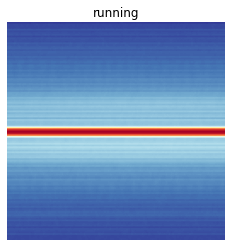

In [273]:
clutter_data = train_data_scaled[np.where(train_label == 'clutter/noise')]
avg_clutter_image = sum(clutter_data)/len(clutter_data)

vehicle_data = train_data_scaled[np.where(train_label == 'vehicle')]
avg_vehicle_image = sum(vehicle_data)/len(vehicle_data)

walking_data = train_data_scaled[np.where(train_label == 'walking')]
avg_walking_image = sum(walking_data)/len(walking_data)

sphere_swing_data = train_data_scaled[np.where(train_label == 'sphere_swing')]
avg_sphere_swing_image = sum(sphere_swing_data)/len(sphere_swing_data)

running_data = train_data_scaled[np.where(train_label == 'running')]
avg_running_image = sum(running_data)/len(running_data)

walking_2_data = train_data_scaled[np.where(train_label == '2_walking')]
avg_walking_2_image = sum(walking_2_data)/len(walking_2_data)


plt.imshow(avg_running_image, cmap='RdYlBu_r')
plt.title(f'{train_label[image_num]}')
plt.axis('off')
plt.show()

In [275]:
avg_clutter_image.shape

(128, 128)

<ipython-input-296-781503787bd2>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(rows, cols, i+1) )
<ipython-input-296-781503787bd2>:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
<ipython-input-296-781503787bd2>:16: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


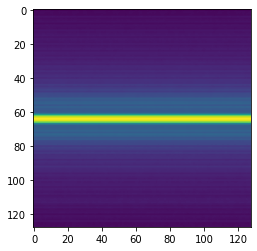

In [296]:
avg_images = np.array([avg_clutter_image, avg_running_image, avg_sphere_swing_image, avg_vehicle_image, avg_walking_2_image, avg_walking_image])
axes=[]

w=10
h=10

cols = 2
rows = 3

for i, image in enumerate(avg_images):
    if i < 6:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        plt.imshow(image)
        subplot_title=("Subplot"+str(i))
        axes[-1].set_title(subplot_title) 
fig.tight_layout()   
plt.show()



Figure(1600x800)


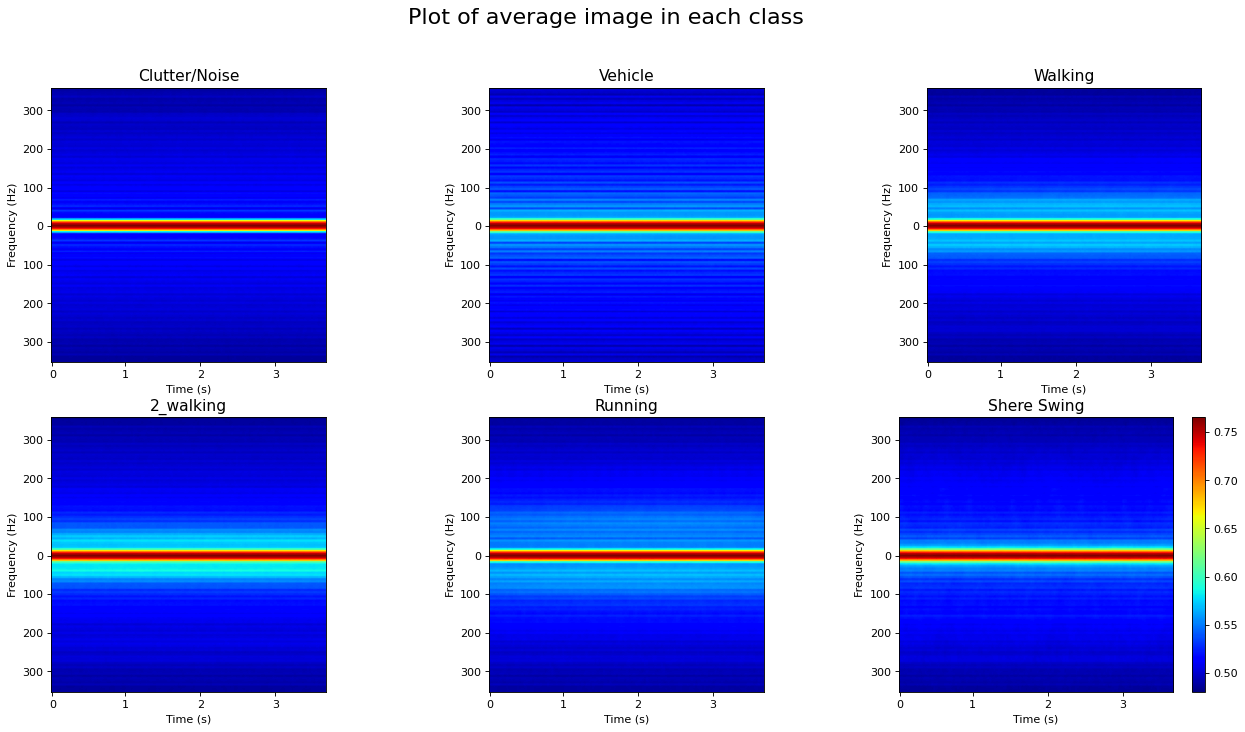

In [366]:
my_dpi = 80
fig = plt.figure(figsize=(20, 10), dpi=my_dpi)
print(fig)

fig.suptitle('Plot of average image in each class', fontsize=20)

# Add plots
ax1 = fig.add_subplot(2, 3, 1)
cs = ax1.imshow(avg_clutter_image, cmap='jet')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax1.set_yticklabels([300, 200, 100, 0, 100, 200, 300])
ax1.set_xticks([0, 34, 69, 104])
ax1.set_xticklabels([0, 1, 2, 3])  

ax1.set_title('Clutter/Noise',   
             fontsize = 14) 

ax2 = fig.add_subplot(2, 3, 2)
ax2.imshow(avg_vehicle_image, cmap='jet')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_title('Vehicle',   
             fontsize = 14)
ax2.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax2.set_yticklabels([300, 200, 100, 0, 100, 200, 300])
ax2.set_xticks([0, 34, 69, 104])
ax2.set_xticklabels([0, 1, 2, 3])  

ax3 = fig.add_subplot(2, 3, 3)
ax3.imshow(avg_walking_image, cmap='jet')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Frequency (Hz)')
ax3.set_title('Walking',   
             fontsize = 14)
ax3.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax3.set_yticklabels([300, 200, 100, 0, 100, 200, 300]) 
ax3.set_xticks([0, 34, 69, 104])
ax3.set_xticklabels([0, 1, 2, 3])  

ax4 = fig.add_subplot(2, 3, 4)
ax4.imshow(avg_walking_2_image, cmap='jet')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Frequency (Hz)')
ax4.set_title('2_walking',   
             fontsize = 14) 
ax4.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax4.set_yticklabels([300, 200, 100, 0, 100, 200, 300])
ax4.set_xticks([0, 34, 69, 104])
ax4.set_xticklabels([0, 1, 2, 3])               

ax5 = fig.add_subplot(2, 3, 5)
ax5.imshow(avg_running_image, cmap='jet')
ax5.set_xlabel('Time (s)')
ax5.set_ylabel('Frequency (Hz)')
ax5.set_title('Running',   
             fontsize = 14)
ax5.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax5.set_yticklabels([300, 200, 100, 0, 100, 200, 300]) 
ax5.set_xticks([0, 34, 69, 104])
ax5.set_xticklabels([0, 1, 2, 3])              

ax6 = fig.add_subplot(2, 3, 6)
ax6.imshow(avg_sphere_swing_image, cmap='jet')
ax6.set_xlabel('Time (s)')
ax6.set_ylabel('Frequency (Hz)')
ax6.set_title('Shere Swing',   
             fontsize = 14) 
ax6.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax6.set_yticklabels([300, 200, 100, 0, 100, 200, 300])
ax6.set_xticks([0, 34, 69, 104])
ax6.set_xticklabels([0, 1, 2, 3]) 

fig.colorbar(cs)
fig.savefig('Subplot_ex3.png')

(array([1.1000000e+02, 2.3690000e+03, 4.9745000e+04, 1.0822050e+06,
        1.9561016e+07, 5.3346883e+07, 6.7682400e+06, 3.6783300e+06,
        2.3165410e+06, 1.6083300e+05]),
 array([0.09242383, 0.17012385, 0.24782386, 0.32552388, 0.40322389,
        0.48092391, 0.55862392, 0.63632394, 0.71402395, 0.79172397,
        0.86942398]),
 <BarContainer object of 10 artists>)

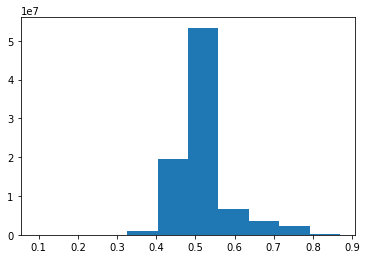

In [16]:
plt.hist(walking_data)

(array([3.1000000e+01, 5.9500000e+02, 1.6167000e+04, 4.2468900e+05,
        9.6575720e+06, 4.1450854e+07, 7.0057040e+06, 2.9682000e+06,
        1.6593150e+06, 5.9113000e+04]),
 array([0.06173346, 0.14374466, 0.22575585, 0.30776704, 0.38977823,
        0.47178942, 0.55380062, 0.63581181, 0.717823  , 0.79983419,
        0.88184539]),
 <BarContainer object of 10 artists>)

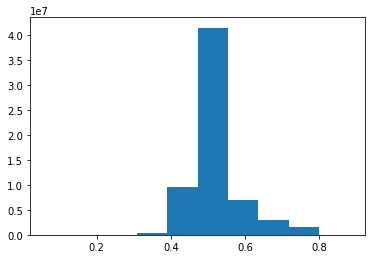

In [17]:
plt.hist(running_data) 

(array([4.1000000e+01, 1.4500000e+03, 5.9011000e+04, 2.4411020e+06,
        4.8916311e+07, 5.4455120e+07, 1.0976880e+07, 2.8489380e+06,
        1.2537960e+06, 2.5618300e+05]),
 array([0.05682816, 0.15114534, 0.24546252, 0.33977971, 0.43409689,
        0.52841408, 0.62273126, 0.71704845, 0.81136563, 0.90568282,
        1.        ]),
 <BarContainer object of 10 artists>)

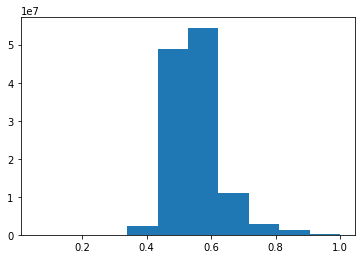

In [18]:
plt.hist(vehicle_data)

(array([5.7000000e+01, 5.2800000e+02, 1.3664000e+04, 3.3932300e+05,
        7.7314060e+06, 5.8561500e+07, 1.0519691e+07, 6.8499700e+05,
        2.0756400e+06, 3.3841000e+05]),
 array([0.05757316, 0.13814616, 0.21871915, 0.29929215, 0.37986514,
        0.46043814, 0.54101114, 0.62158413, 0.70215713, 0.78273012,
        0.86330312]),
 <BarContainer object of 10 artists>)

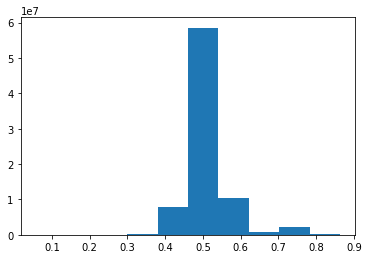

In [19]:
plt.hist(clutter_data)

(array([3.0000000e+01, 6.7200000e+02, 1.4467000e+04, 3.4947600e+05,
        7.6114190e+06, 3.8248587e+07, 6.5700730e+06, 1.7623190e+06,
        1.4400170e+06, 8.5372000e+04]),
 array([0.06331049, 0.14361859, 0.22392669, 0.30423478, 0.38454288,
        0.46485098, 0.54515907, 0.62546717, 0.70577527, 0.78608336,
        0.86639146]),
 <BarContainer object of 10 artists>)

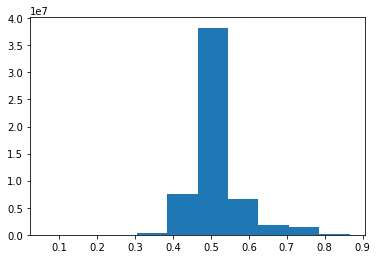

In [20]:
plt.hist(sphere_swing_data)

(array([6.0000000e+00, 1.4500000e+02, 4.0200000e+03, 1.3416700e+05,
        4.2529760e+06, 5.3929275e+07, 1.6602181e+07, 4.2557900e+06,
        2.7241220e+06, 1.1562200e+05]),
 array([0.        , 0.08805162, 0.17610325, 0.26415487, 0.3522065 ,
        0.44025812, 0.52830974, 0.61636137, 0.70441299, 0.79246462,
        0.88051624]),
 <BarContainer object of 10 artists>)

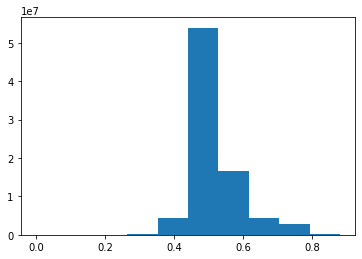

In [21]:
plt.hist(walking_2_data)

In [182]:
walking_data.shape

(86966272,)

In [183]:
# Can create box and whisker plots based on this data
data = [walking_data, vehicle_data, clutter_data, sphere_swing_data, walking_2_data] # Add running class

In [184]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data) 

# show plot 
plt.show()  


KeyboardInterrupt: 

In [185]:
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(walking_data) 
  
# show plot 
plt.show() 

In [11]:
ax = sns.boxplot(x=walking_data)

Error in callback <function flush_figures at 0x000001EDA4439430> (for post_execute):


KeyboardInterrupt: 